#Loan Approval Predictions - Supervised Machine Learning

This project aims to develop a machine learning model to predict loan approval status based on applicant information such as income, assets, CIBIL Score, and demographics. Two models will be used - Logistic Regression and Decision Tree algorithms, Using Different KPIs, both the models will be compared and the better one will be chosen

##Pre-Processing

In [1]:
!pip install pandas
!pip install kagglehub
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [2]:
import pandas as pd
import kagglehub as kh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Download latest version
path = kh.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/loan_approval_dataset.csv")
df.columns = df.columns.str.strip()

df



Path to dataset files: /Users/shresht/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
print("Basic Dataset Information:") #to check that the data types are ok
print(df.info())


Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
Non

In [4]:
print("\nChecking for missing values:") #self-explanatory
print(df.isnull().sum())


Checking for missing values:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [5]:
print("\nBasic statistics of numerical columns:") #check usual values for all data
print(df.describe())


Basic statistics of numerical columns:
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172


Loan Status Distribution:
<bound method IndexOpsMixin.value_counts of 0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object>
loan_status
 Approved    0.62216
 Rejected    0.37784
Name: proportion, dtype: float64


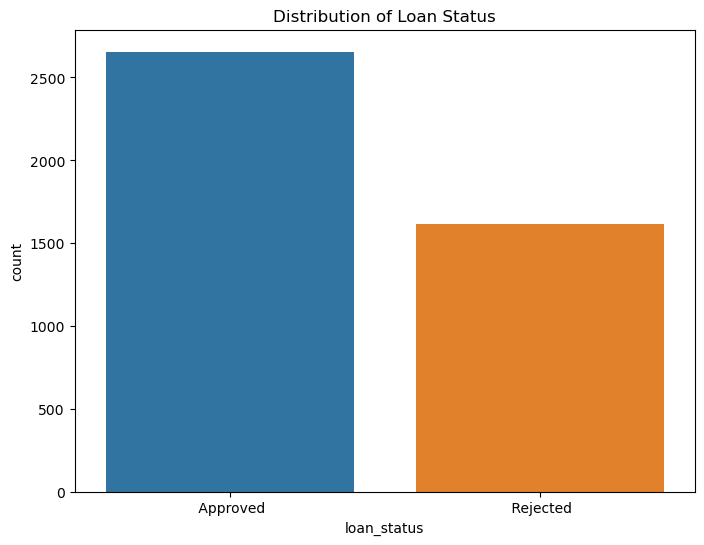

In [6]:
#overall distribution for approval and rejection
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts)
print(df['loan_status'].value_counts(normalize=True)) #normalize is to convert it into percentages

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

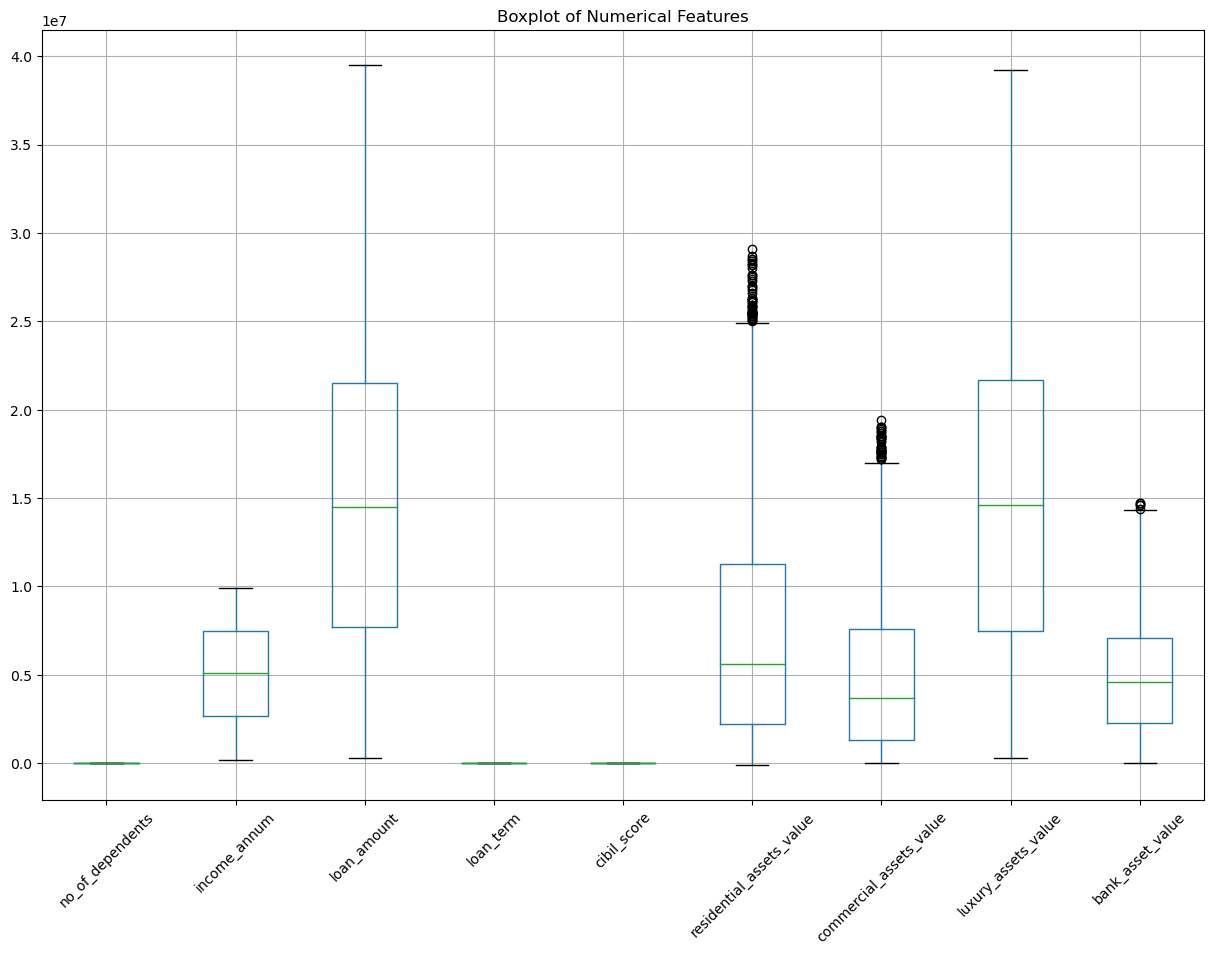

In [7]:
#check for outliers(dont know what to do with them)
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()


Distribution of education:
education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64


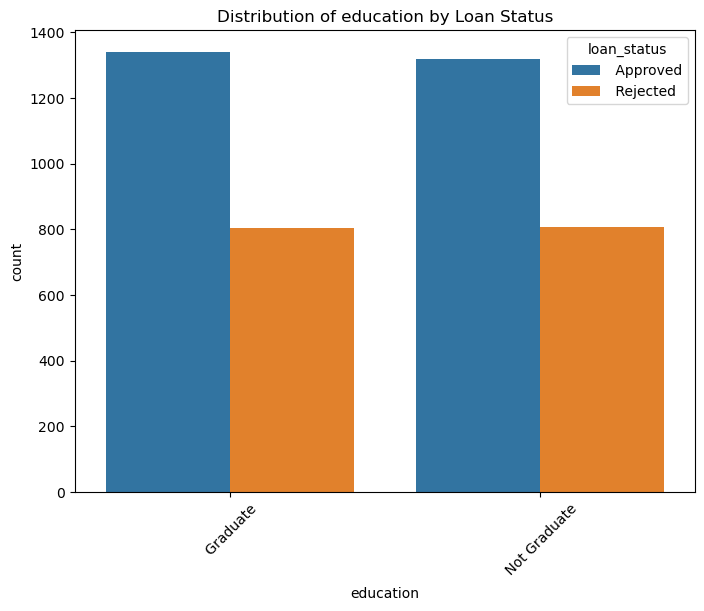


Distribution of self_employed:
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64


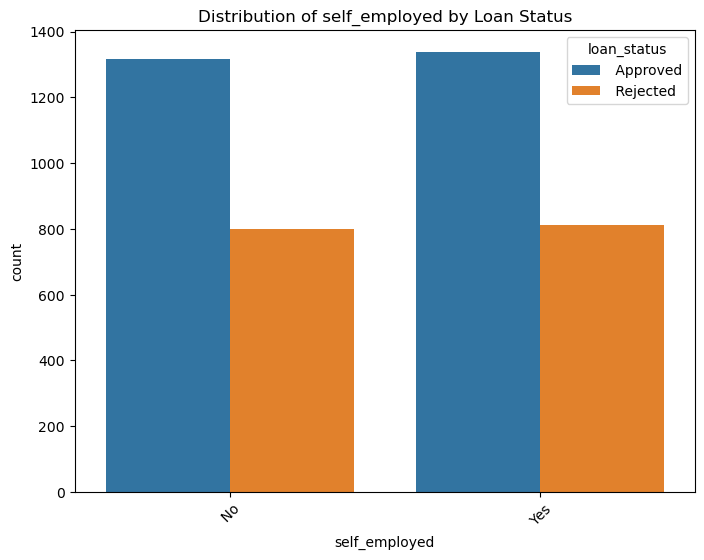

In [8]:
#self-employed and education are imp to see what trends pop related to approval
categorical_cols = ['education', 'self_employed']

for col in categorical_cols:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
df.drop(columns=['loan_id'], inplace=True)

# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Feature Engineering
# Create new features that might be useful
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df['total_assets'] = (df['residential_assets_value'] + 
                      df['commercial_assets_value'] + 
                      df['luxury_assets_value'] + 
                      df['bank_asset_value'])
df['assets_to_loan'] = df['total_assets'] / df['loan_amount']

# Print unique values to see exact spelling/format before encoding
print("Unique values in loan_status before encoding:")
print(df['loan_status'].unique())
print(df['education'].unique())

# Apply label encoding to the 'loan_status' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

# Print unique values after encoding
print("\nUnique values in loan_status after encoding:")
print(df['loan_status'].unique())

# Check the data type of loan_status
print("\nData type of loan_status:", df['loan_status'].dtype)

# Final shape of the DataFrame
print("\nFinal preprocessed dataset shape:", df.shape)
print("\nFinal columns:", df.columns.tolist())

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')
Unique values in loan_status before encoding:
[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']

Unique values in loan_status after encoding:
[0 1]

Data type of loan_status: int64

Final preprocessed dataset shape: (4269, 15)

Final columns: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'debt_to_income', 'total_assets', 'assets_to_loan']


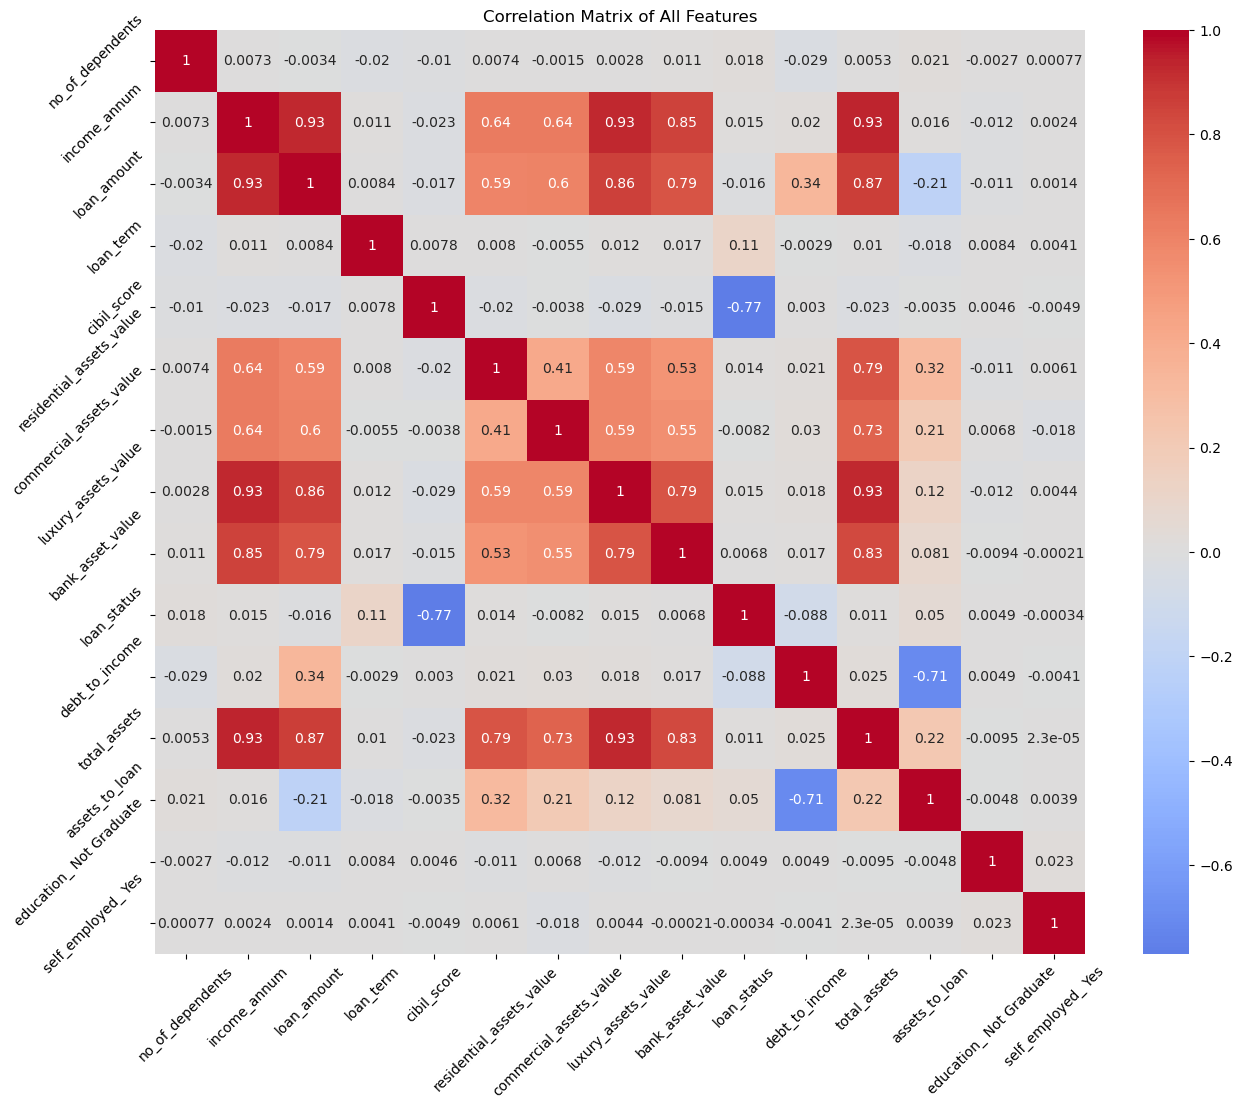

In [10]:
#correlation heatmap for all features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # categorical columns are converted to numeric vals to make sure heat map works
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [11]:
# X(Features) and y(Targets)
X = df.drop('loan_status', axis=1)
y = df['loan_status']


print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


print("\nUnique values in loan_status after encoding:")
print(y.unique())


Feature matrix shape: (4269, 14)
Target vector shape: (4269,)

Unique values in loan_status after encoding:
[0 1]


##Model Training 

In [12]:
# Scikit-learn for everything
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [13]:
# Use encoded dataframe for features
X_encoded = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True) #random_state 42 is for making sure its the same

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_scaled, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

# Fit the model on the full dataset
logreg.fit(X_scaled, y)
y_pred = logreg.predict(X_scaled)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Cross-validation scores: [0.9028103  0.92271663 0.91217799 0.91451991 0.9109027 ]
Average cross-validation accuracy: 0.9126255041443481
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2656
           1       0.89      0.88      0.89      1613

    accuracy                           0.91      4269
   macro avg       0.91      0.91      0.91      4269
weighted avg       0.91      0.91      0.91      4269

Confusion Matrix:
[[2477  179]
 [ 187 1426]]


In [14]:
# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver that supports l1 penalty
}

# Initialize GridSearchCV with logistic regression and KFold
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=kf, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best estimator to predict
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_scaled)

# Print classification report and confusion matrix for best model
print("Classification Report for Best Model:")
print(classification_report(y, y_pred_best))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y, y_pred_best))


Best parameters found:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy:  0.9367514022694389
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2656
           1       0.89      0.94      0.91      1613

    accuracy                           0.93      4269
   macro avg       0.93      0.93      0.93      4269
weighted avg       0.93      0.93      0.93      4269

Confusion Matrix for Best Model:
[[2468  188]
 [  97 1516]]


In [15]:
# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dtree, X_scaled, y, cv=kf, scoring='accuracy')
print("Decision Tree Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

# Fit the model on the full dataset
dtree.fit(X_scaled, y)
y_pred = dtree.predict(X_scaled)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Decision Tree Cross-validation scores: [1.         1.         0.99882904 1.         1.        ]
Average cross-validation accuracy: 0.9997658079625292
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2656
           1       1.00      1.00      1.00      1613

    accuracy                           1.00      4269
   macro avg       1.00      1.00      1.00      4269
weighted avg       1.00      1.00      1.00      4269

Confusion Matrix:
[[2656    0]
 [   0 1613]]


In [16]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=kf, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best parameters and best score
print("Best parameters found for Decision Tree: ", grid_search.best_params_)
print("Best cross-validation accuracy for Decision Tree: ", grid_search.best_score_)

# Use the best estimator to predict
best_dtree = grid_search.best_estimator_
y_pred_best = best_dtree.predict(X_scaled)

# Print classification report and confusion matrix for best model
print("Classification Report for Best Decision Tree Model:")
print(classification_report(y, y_pred_best))

print("Confusion Matrix for Best Decision Tree Model:")
print(confusion_matrix(y, y_pred_best))

Best parameters found for Decision Tree:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree:  0.9997658079625292
Classification Report for Best Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2656
           1       1.00      1.00      1.00      1613

    accuracy                           1.00      4269
   macro avg       1.00      1.00      1.00      4269
weighted avg       1.00      1.00      1.00      4269

Confusion Matrix for Best Decision Tree Model:
[[2656    0]
 [   0 1613]]
